In [4]:
# 1. Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization

In [5]:
# 2. Define Profit Simulation Function
def simulate_profit(discount):
    """
    Simulates profit based on given discount.
    """
    base_price = 100
    cost = 60
    unit_profit = base_price * (1 - discount / 100) - cost

    # Demand function: higher around 18%, lower as discount deviates
    adjusted_demand = 1000 * (1 + (0.4 - 0.02 * abs(discount - 18)))
    total_profit = unit_profit * adjusted_demand
    return total_profit

In [6]:
# 3. Set up Bayesian Optimizer
optimizer = BayesianOptimization(
    f=simulate_profit,
    pbounds={'discount': (5, 30)},
    random_state=42,
    verbose=0
)

In [7]:
# 4. Run Optimization
optimizer.maximize(init_points=3, n_iter=10)

In [8]:
# 5. Extract Best Results
best_discount = optimizer.max['params']['discount']
best_profit = optimizer.max['target']

In [9]:
# 6. Track Tested Points
tested_discounts = [res['params']['discount'] for res in optimizer.res]
tested_profits = [res['target'] for res in optimizer.res]

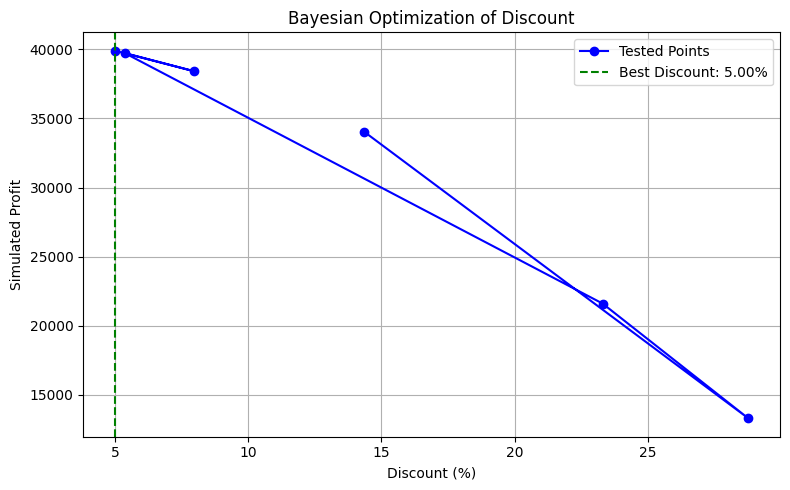

In [10]:
# 7. Plot Optimization Results
plt.figure(figsize=(8, 5))
plt.plot(tested_discounts, tested_profits, 'bo-', label='Tested Points')
plt.axvline(best_discount, color='green', linestyle='--', label=f'Best Discount: {best_discount:.2f}%')
plt.xlabel("Discount (%)")
plt.ylabel("Simulated Profit")
plt.title("Bayesian Optimization of Discount")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# 8. Print Summary
print(f"🔍 Best Discount: {best_discount:.2f}%")
print(f"💰 Expected Profit: ${best_profit:,.2f}")

🔍 Best Discount: 5.00%
💰 Expected Profit: $39,900.00
